### Importing Libraries

In [54]:
import numpy as np
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

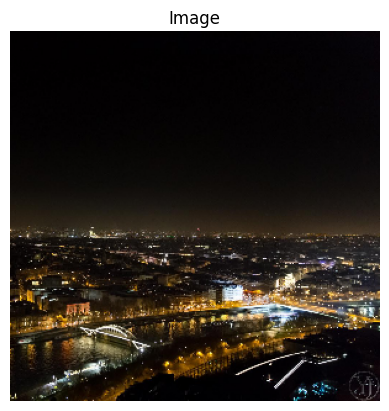

25.984933333333334

In [55]:
# Read the image
img_night = cv2.imread("Combined/0 - Copy.jpg")
img_night = cv2.resize(img_night,(300,300))

# Convert the image from BGR to RGB
img_night_rgb = cv2.cvtColor(img_night, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_night_rgb)
plt.title("Image")
plt.axis('off')  # Hide axis
plt.show()

img_night_rgb.mean()

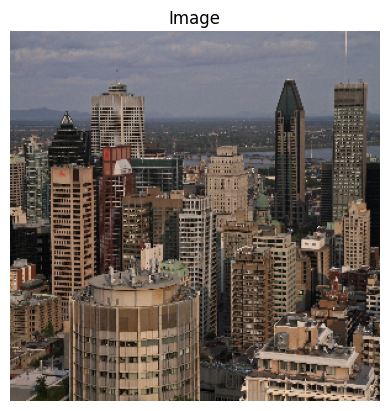

92.22198148148148

In [56]:
# Read the image
img_day = cv2.imread("Combined/0.jpg")

# Convert the image from BGR to RGB
img_day = cv2.resize(img_day,(300,300))
img_day_rgb = cv2.cvtColor(img_day, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_day_rgb)
plt.title("Image")
plt.axis('off')  # Hide axis
plt.show()
img_day_rgb.mean()

### Inserting Data


In [57]:
images = []

for filename in os.listdir("Combined"):
    file_path = os.path.join("Combined",filename)
    img = cv2.imread(file_path)
    
    if img is not None:
        img = cv2.resize(img,(50,50))
        images.append(img)

### Taking Mean

In [58]:
meanRGB = []

for img in images:
    mean_red = np.mean(img[:, :, 0])
    mean_green = np.mean(img[:, :, 1])
    mean_blue = np.mean(img[:, :, 2])

    mean = (mean_blue+mean_green+mean_red)/3

    meanRGB.append(mean)



In [59]:
meanRGB

[25.566533333333336,
 92.968,
 17.4788,
 132.1102666666667,
 46.9716,
 87.97640000000001,
 47.73146666666667,
 126.61066666666666,
 62.94213333333334,
 134.10093333333336,
 22.676933333333334,
 136.79626666666667,
 28.142000000000007,
 106.63119999999999,
 30.734133333333336,
 133.49533333333332,
 56.62226666666666,
 101.77706666666666,
 23.8372,
 168.51520000000002,
 24.142800000000005,
 129.12733333333335,
 46.34546666666666,
 143.19053333333332,
 27.88693333333333,
 114.51626666666668,
 32.22266666666666,
 144.0909333333333,
 30.72293333333333,
 105.66986666666666,
 63.68453333333334,
 79.27239999999999,
 62.29919999999999,
 124.89146666666666,
 35.165600000000005,
 116.3404,
 64.20293333333332,
 125.98706666666668,
 43.90813333333333,
 168.7056,
 46.38106666666666,
 118.25720000000001,
 34.77226666666667,
 64.57453333333333,
 32.273466666666664,
 130.90453333333332,
 44.82986666666667,
 94.11013333333334,
 60.22106666666667,
 108.45093333333334,
 32.0,
 136.2444,
 43.47226666666666

### Applying K mean clustring to array

In [60]:
k = 2 # No of clusters

meanRGB = np.array(meanRGB).reshape(-1, 1)

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(meanRGB)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the results
print("Cluster Centers:\n", centers)
print("Labels:\n", labels)

Cluster Centers:
 [[ 45.56822572]
 [121.04949468]]
Labels:
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1

### Plotting The Cluster

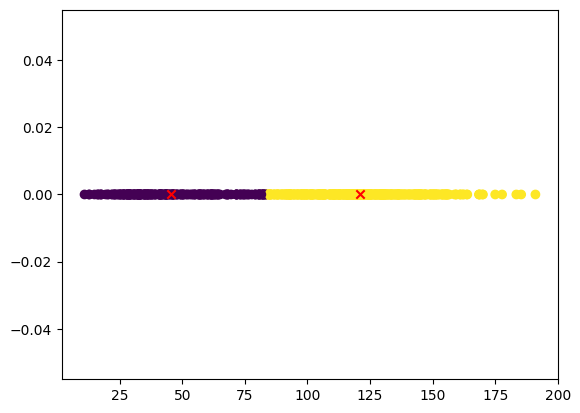

In [61]:
plt.scatter(meanRGB, np.zeros_like(meanRGB), c=labels, cmap='viridis')
plt.scatter(centers, np.zeros_like(centers), c='red', marker='x') # cluster centers
plt.show()

### Separating the Cluster in two separate arrays keeping the track of original Indices

In [62]:
mask_cluster_night = labels == 0
mask_cluster_day = labels == 1

# Extracting indices for each cluster
indices_cluster_night = np.where(mask_cluster_night)[0]
indices_cluster_day = np.where(mask_cluster_day)[0]

# Extracting the original values for each cluster
values_cluster_night = meanRGB[mask_cluster_night].flatten()
values_cluster_day = meanRGB[mask_cluster_day].flatten()

# Print the indices and values for each cluster
# print("Cluster Night Indices:\n", indices_cluster_night)
# print("Cluster Night Values:\n", values_cluster_night)
# print("Cluster Day Indices:\n", indices_cluster_day)
# print("Cluster Day Values:\n", values_cluster_day)

### Separating Images Now

In [63]:
black_images = [images[i] for i in indices_cluster_night]
white_images = [images[i] for i in indices_cluster_day]

### Creating Collage

##### This Funtion will use pictures in repeat to complete the text. If more pictures are given as input then less pictures will be used in reppeat.

##### And this function will modify the collage according to the size of TEXT, so the text could fit propely in collage

In [91]:
def create_detailed_collage(text, text_images, bg_images, pixel_size=(25, 25)):
    
    text_font = cv2.FONT_HERSHEY_DUPLEX
    font_scale = 20
    font_thickness = 20  
    text_size, _ = cv2.getTextSize(text, text_font, font_scale, font_thickness)

    # Calculate the required collage size based on text size and pixel size
    collage_width = (text_size[0] // pixel_size[0] + 1) * pixel_size[0]
    collage_height = (text_size[1] // pixel_size[1] + 1) * pixel_size[1]

    # Create a blank collage
    collage = np.zeros((collage_height, collage_width, 3), dtype=np.uint8)
    collage.fill(255)  # Fill with white background

    # Calculate the position to center the text in the collage
    text_x = (collage_width - text_size[0]) // 2
    text_y = (collage_height + text_size[1]) // 2

    # Create a text mask to determine where text should be placed
    text_mask = np.zeros((collage_height, collage_width), dtype=np.uint8)
    cv2.putText(text_mask, text, (text_x, text_y), text_font, font_scale, (255), font_thickness)

    # Resize text mask to match the collage pixel size
    text_mask_resized = cv2.resize(text_mask, (collage_width // pixel_size[0], collage_height // pixel_size[1]), interpolation=cv2.INTER_NEAREST)

    # Filling the collage with images
    for i in range(collage_height // pixel_size[1]):
        for j in range(collage_width // pixel_size[0]):
            if text_mask_resized[i, j] == 255:
                img = text_images[(i * (collage_width // pixel_size[0]) + j) % len(text_images)]
            else:
                img = bg_images[(i * (collage_width // pixel_size[0]) + j) % len(bg_images)]
            img_resized = cv2.resize(img, pixel_size)
            collage[i * pixel_size[1]:(i + 1) * pixel_size[1], j * pixel_size[0]:(j + 1) * pixel_size[0]] = img_resized

    return collage

### MAIN FUNCTION

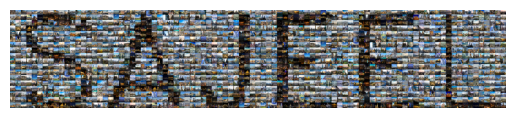

In [96]:
# Text to be displayed in the collage
text = "SAJEEL"

collage = create_detailed_collage(text, black_images, white_images)

# I have used matplot to display the image cause my cv2.imshow() function was giving a GUI ERROR
plt.imshow(cv2.cvtColor(collage, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()